In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
Data=pd.read_csv("MultipleL.csv",header=None)

In [3]:
Data

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [4]:
Data.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [5]:
Features=Data.loc[:, '0':'2']

In [6]:
Features

,0,1,2
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70
5,53,46,55
6,69,74,77
7,47,56,60
8,87,79,90
9,79,70,88


In [7]:
Y=Data[[3]]

In [8]:
Y

,3
0,152
1,185
2,180
3,196
4,142
5,101
6,149
7,115
8,175
9,164


In [9]:
Features=np.array(Features)

In [10]:
Y=np.array(Y)

In [11]:
Y

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]], dtype=int64)

In [12]:
ones=np.ones(shape=Y.shape)

In [13]:
Features=np.hstack([ones,Features])

In [14]:
Features

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [15]:
Features.shape

(25, 4)

In [16]:
Y

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]], dtype=int64)

In [17]:
Features


array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [18]:
def MultiVariableGD (Data,Target,alpha):
    Earr=[]
    Carr=[]
    TH0arr=[]
    TH1arr=[]
    count=1
    Carr.append(count)
    TH=np.zeros(shape=(Data.shape[1],1))
    TH0arr.extend(TH[0])
    TH1arr.extend(TH[1])
    YD=Data@TH
    Error=YD-Target
    MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
    Earr.append(MSError)
    GDV=(1/(len(Target)))*(Data.T)@Error
    GDVN=np.linalg.norm(GDV)
    while(GDVN>=0.0001):
        count+=1
        Carr.append(count)
        TH=TH-(alpha*GDV)
        TH0arr.extend(TH[0])
        TH1arr.extend(TH[1])
        YD=Data@TH
        Error=YD-Target
        MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
        Earr.append(MSError)
        GDV=(1/(len(Target)))*(Data.T)@Error
        GDVN=np.linalg.norm(GDV)
        if (abs(Earr[-1]-Earr[-2])<0.01):
            break
    return TH,Carr,Earr,count,TH0arr,TH1arr

In [19]:
TH,Carr,Earr,count,TH0arr,TH1arr=MultiVariableGD (Features,Y,0.0001)

In [20]:
Y.shape

(25, 1)

In [21]:
(Features.T).shape

(4, 25)

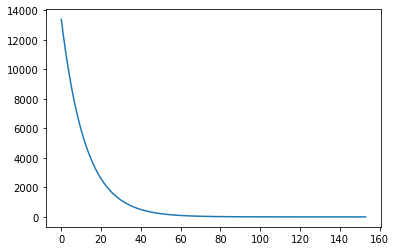

In [22]:
plt.plot(Earr)

Text(0, 0.5, 'MSE')

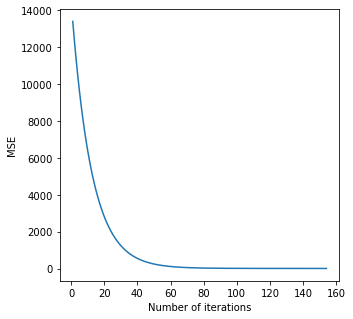

In [23]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

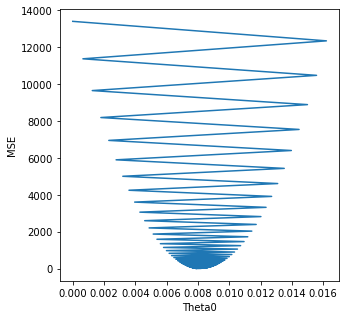

In [24]:
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

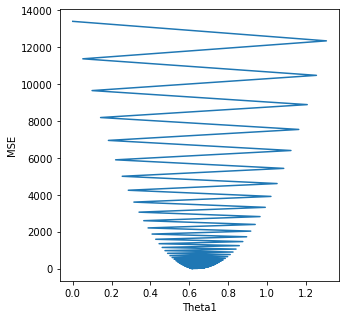

In [25]:
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

In [26]:
from sklearn.metrics import r2_score

In [27]:
YD=Data@TH

In [28]:
r2_score(YD,Y)

-3.2273770773621946

In [29]:
TH

array([[0.00787922],
       [0.61241733],
       [0.61391507],
       [0.79980931]])

In [30]:
D=np.array(Data)

In [31]:
YD=D@TH

In [32]:
Y

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]], dtype=int64)

In [33]:
r2_score(YD,Y)

-3.227377077362193